In [1]:
from fastai import *
from fastai.vision import *
import pandas


Bad key "text.kerning_factor" on line 4 in
c:\umdprojects\anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
data = []

cat_directory = 'output/cat_dog/train/cat/'
dog_directory = 'output/cat_dog/train/dog/'

for filename in os.listdir(cat_directory):
    if filename.endswith(".jpg"):
        data.append((os.path.join(cat_directory, filename),'cat'))
    
for filename in os.listdir(dog_directory):
    if filename.endswith(".jpg"):
        data.append((os.path.join(dog_directory, filename),'dog'))


In [3]:
df_dog_cat = pd.DataFrame(data, columns = ['filepath' , 'label'])

In [4]:
data = ImageDataBunch.from_df("", df_dog_cat, size=50).normalize(imagenet_stats)

In [5]:
data.classes, len(data.train_ds), len(data.valid_ds)

(['cat', 'dog'], 168, 42)

In [6]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)
learn.save('stage0')

c:\umdprojects\anaconda\lib\site-packages\fastai\vision\learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to C:\Users\Jessica Q/.cache\torch\checkpoints\resnet50-19c8e357.pth


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


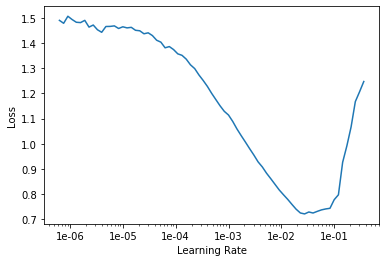

In [8]:
learn.lr_find()
learn.recorder.plot()

In [9]:
# resnet50
learn.load('stage0')
learn.fit_one_cycle(20)

epoch,train_loss,valid_loss,error_rate,time
0,1.472563,1.423259,0.690476,01:00
1,1.197574,1.066272,0.547619,00:57
2,1.137003,0.788150,0.380952,01:15
3,1.022968,0.802247,0.285714,01:31
4,0.901561,0.826125,0.333333,01:17
5,0.776576,0.980732,0.285714,01:00
6,0.701440,1.228181,0.309524,01:00
7,0.645071,1.270622,0.357143,01:04
8,0.580303,1.322678,0.333333,01:03
9,0.544817,1.440451,0.333333,01:22


In [10]:
interp = ClassificationInterpretation.from_learner(learn)

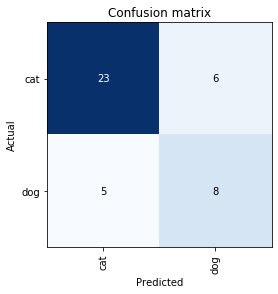

In [11]:
interp.plot_confusion_matrix()